https://igraph.readthedocs.io/en/stable/api/igraph.Vertex.html#predecessors
https://igraph.readthedocs.io/en/stable/api/igraph.Graph.html#intersection

https://igraph.org/python/versions/latest/tutorials/visual_style/visual_style.html
https://igraph.org/python/tutorial/0.9.6/tutorial.html
https://igraph.org/python/api/latest/igraph.Graph.html

In [1]:
!pip install igraph matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:0000:0100:01


In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import random

In [14]:
from enum import Enum

def format_skill(skill, level):
  return "%s%s%s" % (skill, "\n", level)

class Skills(Enum):
    M = "Maths"
    M1 = format_skill("Maths", "I")
    M11 = format_skill("Maths", "I - 1")
    M11a = format_skill("Maths", "I - 1a")
    M11b = format_skill("Maths", "I - 1b")
    M12 = format_skill("Maths", "I - 2")
    M2 = format_skill("Maths", "II")
    M21 = format_skill("Maths", "II - 1")
    M21a = format_skill("Maths", "II - 1a")
    M21b = format_skill("Maths", "II - 1b")
    M22 = format_skill("Maths", "II - 2")

    F = "French"
    F1 = format_skill("French", "I")
    F2 = format_skill("French", "II")

class Colors(Enum):
    GREY = "grey"
    TEAL = "teal"
    RED = "red"
    GREEN = "green"
    PINK = "pink"

_color = "color"
_name = "name"
_label = "label"
_etl = "etl"

_default_etl = 1

In [15]:
# GlobalGraph
GolbalGraph = ig.Graph().as_directed()

# F
GolbalGraph.add_vertex(Skills.F.value)

# F1
GolbalGraph.add_vertex(Skills.F1.value)
GolbalGraph.add_edge(Skills.F1.value, Skills.F.value)

# F2
GolbalGraph.add_vertex(Skills.F2.value)
GolbalGraph.add_edge(Skills.F2.value, Skills.F.value)
GolbalGraph.add_edge(Skills.F1.value, Skills.F2.value)

# M1
GolbalGraph.add_vertex(Skills.M1.value)

# M11
GolbalGraph.add_vertex(Skills.M11.value)
GolbalGraph.add_edge(Skills.M11.value, Skills.M1.value)

# M11a
GolbalGraph.add_vertex(Skills.M11a.value)
GolbalGraph.add_edge(Skills.M11a.value, Skills.M11.value)

# M11b
GolbalGraph.add_vertex(Skills.M11b.value)
GolbalGraph.add_edge(Skills.M11b.value, Skills.M11.value)
GolbalGraph.add_edge(Skills.M11a.value, Skills.M11b.value)

# M12
GolbalGraph.add_vertex(Skills.M12.value)
GolbalGraph.add_edge(Skills.M12.value, Skills.M1.value)
GolbalGraph.add_edge(Skills.M11.value, Skills.M12.value)

# M2
GolbalGraph.add_vertex(Skills.M2.value)
GolbalGraph.add_edge(Skills.M1.value, Skills.M2.value)

# M21
GolbalGraph.add_vertex(Skills.M21.value)
GolbalGraph.add_edge(Skills.M21.value, Skills.M2.value)

# M21a
GolbalGraph.add_vertex(Skills.M21a.value)
GolbalGraph.add_edge(Skills.M21a.value, Skills.M21.value)

# M21b
GolbalGraph.add_vertex(Skills.M21b.value)
GolbalGraph.add_edge(Skills.M21b.value, Skills.M21.value)
GolbalGraph.add_edge(Skills.M21a.value, Skills.M21b.value)

# M22
GolbalGraph.add_vertex(Skills.M22.value)
GolbalGraph.add_edge(Skills.M22.value, Skills.M2.value)
GolbalGraph.add_edge(Skills.M21.value, Skills.M22.value)

# M
GolbalGraph.add_vertex(Skills.M.value)
GolbalGraph.add_edge(Skills.M1.value, Skills.M.value)
GolbalGraph.add_edge(Skills.M2.value, Skills.M.value)

# Add labels equal to vertices names
GolbalGraph.vs[_label] = GolbalGraph.vs[_name]

# 

# Color vertices per subject
M_vertices = GolbalGraph.vs.select(lambda vertex: vertex[_name].startswith("Math"))
M_vertices[_color] = Colors.TEAL.value

F_vertices = GolbalGraph.vs.select(lambda vertex: vertex[_name].startswith("French"))
F_vertices[_color] = Colors.PINK.value

# Give all vertices default ETL
M_vertices[_etl] = _default_etl

# Give all vertices default ETL
GolbalGraph.vs["label_size"] = 14

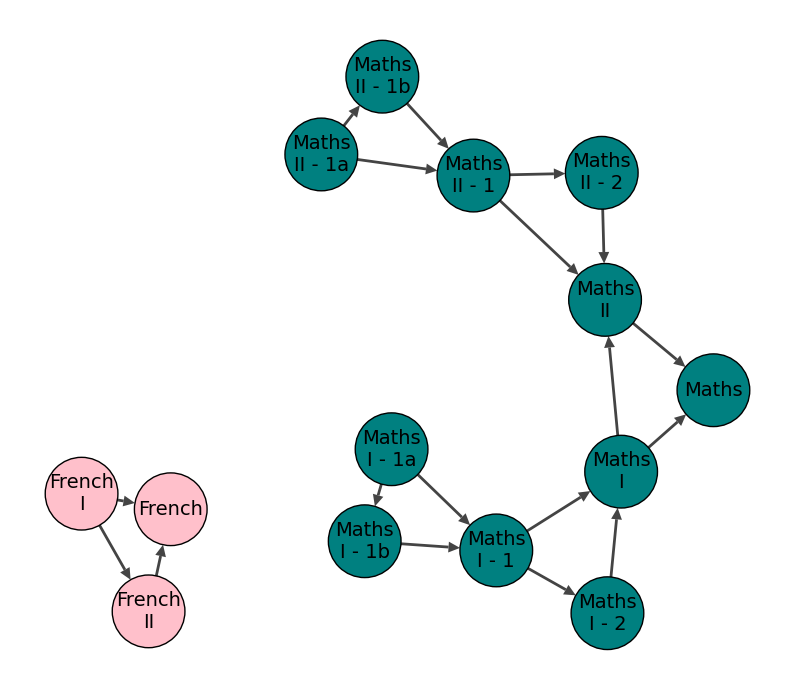

In [5]:
visual_style = {
    #"edge_width": 0.3,
    "vertex_size": 0.6,
    #"palette": "heat",
    #"layout": "fruchterman_reingold",
}

def pplot(g):
  plt.rcParams["figure.figsize"] = (10, 10)
  random.seed(0)
  fig, ax = plt.subplots()
  ig.plot(
      g,
      target=ax,
      **visual_style
  )
  plt.show()

pplot(GolbalGraph)

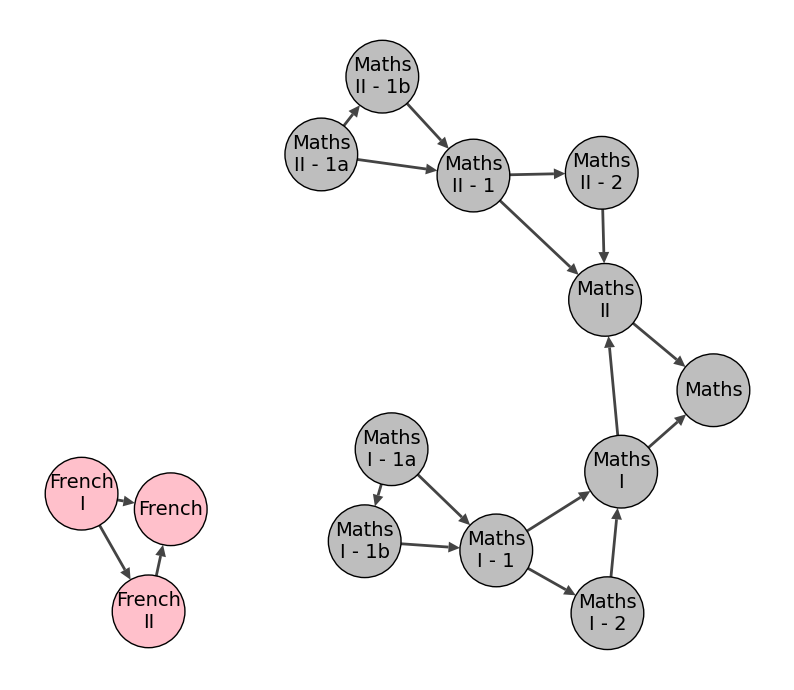

In [6]:
# Select subgraph & color

MathSubGraph = GolbalGraph.copy()
_M_elems = MathSubGraph.vs.select(lambda vertex: vertex[_name].startswith("Math"))
_M_elems[_color] = Colors.TEAL.value

_notM_elems = MathSubGraph.vs.select(lambda vertex: vertex[_name].startswith("Math"))
_notM_elems[_color] = Colors.GREY.value


pplot(MathSubGraph)

# MathSubGraph.vs.select(lambda vertex: vertex[_name].startswith("Math"))[_color] = Colors.GREY.value
# pplot(GolbalGraph.induced_subgraph(MathSubGraph))

In [7]:
# Get ETL for learnign Maths

_M_etl = [v[_etl] for v in _M_elems]
print(sum(_M_etl))

11


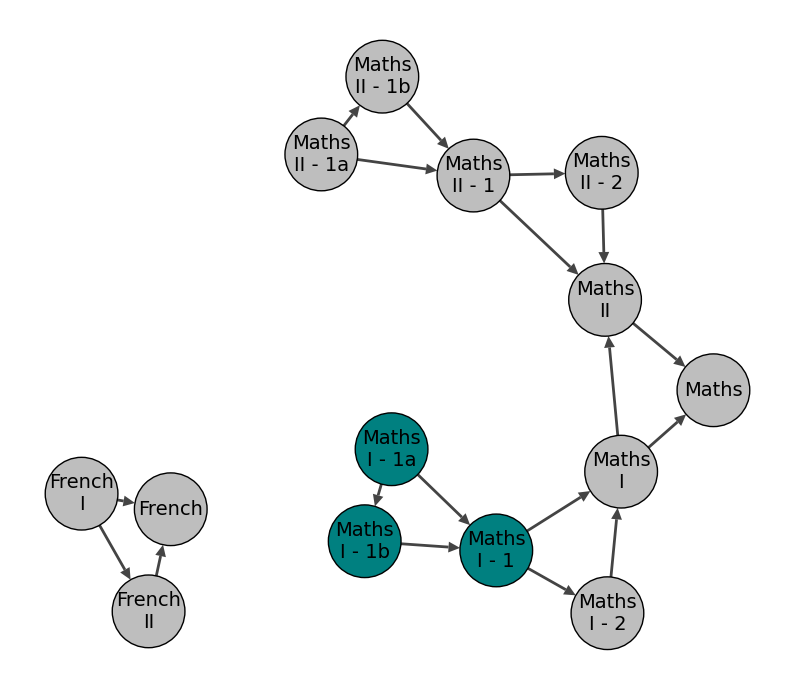

In [8]:
# Create a dummy personnal graph (non nill subgraph of the global)

MyGraph = GolbalGraph.copy()
MyVertices = MyGraph.vs.select(lambda vertex: vertex[_name].startswith("Maths\nI - 1"))

#NotMyVertices = MyGraph.vs.select(lambda vertex: not(vertex[_name].startswith("Maths\nI - 1")))
NotMyVertices = MyGraph.vs.select(lambda vertex: vertex not in MyVertices)

NotMyVertices[_color] = Colors.GREY.value

pplot(MyGraph)

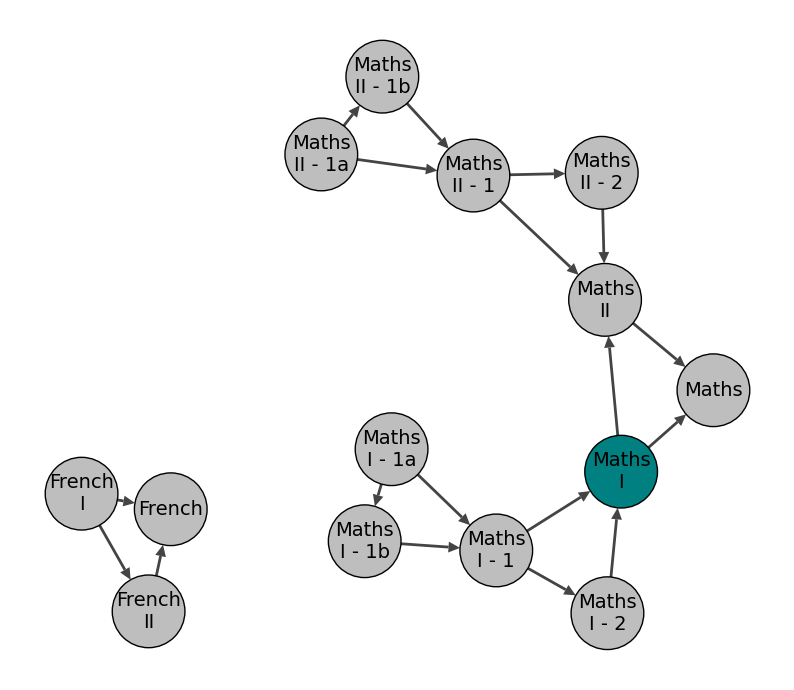

In [9]:
# Select & isolate target vertex

TargetGraph = GolbalGraph.copy()
# M = TargetGraph.vs.find(Skills.M.value)
## Work with select instead of find to work with VertexSeq object

M1 = TargetGraph.vs.select(lambda vertex: vertex[_name] in [Skills.M1.value])
notM1 = TargetGraph.vs.select(lambda vertex: vertex not in M1)
notM1[_color] = Colors.GREY.value

pplot(TargetGraph)

In [10]:
TargetGraph = GolbalGraph.copy()
Mv = TargetGraph.vs.find(Skills.M.value)
Mv.predecessors()

[igraph.Vertex(<igraph.Graph object at 0x7f1724fc8640>, 3, {'name': 'Maths\nI', 'label': 'Maths\nI', 'color': 'teal', 'etl': 1, 'label_size': 14}),
 igraph.Vertex(<igraph.Graph object at 0x7f1724fc8640>, 8, {'name': 'Maths\nII', 'label': 'Maths\nII', 'color': 'teal', 'etl': 1, 'label_size': 14})]

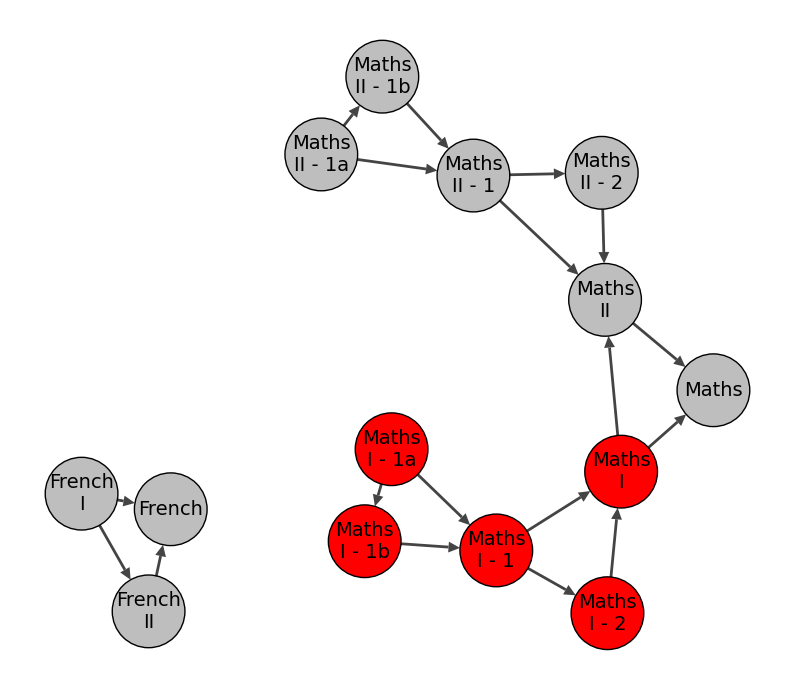

In [11]:
# Create a target graph from the target node (recursively browse predecessors)

def mergeLists(a, b):
  for i in b:
    if i not in a:
      a.append(i)
  return a

def getAllPredecessors(vertexseq_in, vertices_list_out=[]):
  for v in vertexseq_in:
    if v[_name] not in vertices_list_out:
      vertices_list_out.append(v[_name])
    
    vertices_list_out = mergeLists(vertices_list_out, getAllPredecessors(v.predecessors(), vertices_list_out))
  
  return vertices_list_out

M1TargetGraph = GolbalGraph.copy()

_M1_target_name = getAllPredecessors(M1)
_M1_target = M1TargetGraph.vs.select(lambda vertex: vertex[_name] in _M1_target_name)
_notM1_target = M1TargetGraph.vs.select(lambda vertex: vertex[_name] not in _M1_target_name)

_notM1_target[_color] = Colors.GREY.value
_M1_target[_color] = Colors.RED.value

pplot(M1TargetGraph)

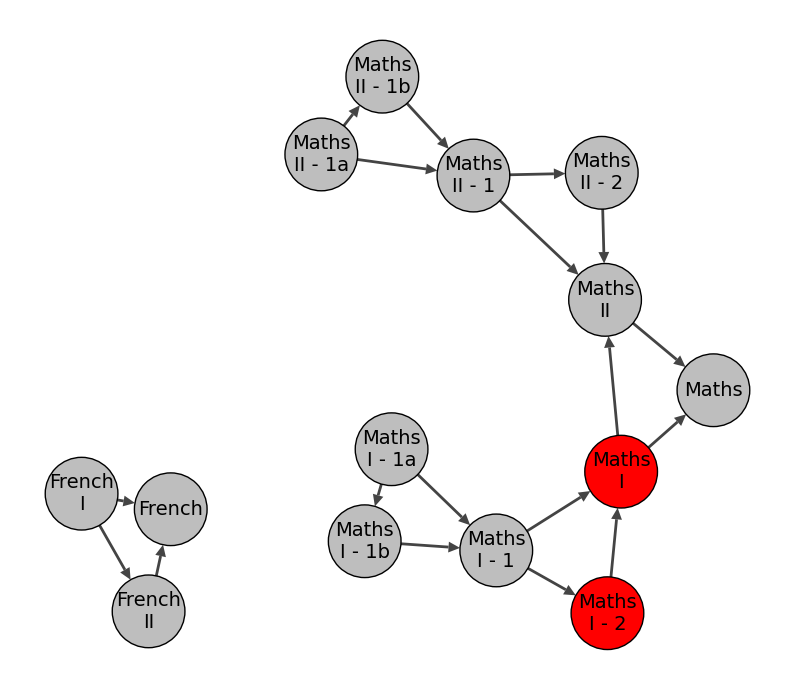

In [12]:
# Create the diff between the target graph and the personnal graph

diffGraph = GolbalGraph.copy()

diffGraph.vs[_color] = Colors.GREY.value

MyVerticesName = MyGraph.vs.select(lambda vertex: vertex[_name].startswith("Maths\nI - 1"))[_name]
NotMyVertices[_color] = Colors.GREY.value

diffVertices = diffGraph.vs.select(lambda vertex: vertex[_name] in _M1_target_name and vertex[_name] not in MyVerticesName)
diffVertices[_color] = Colors.RED.value

pplot(diffGraph)

In [13]:
# ETL for target graph

sum(diffVertices[_etl])

2